In [52]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

#  Load the dataset
df = pd.read_csv('college_student_placement_dataset.csv')

#  Displaying initial data insights
print("Dataset Information and Shape")
print(f"Shape of Dataset: {df.shape} (Rows, Columns)")

#  Show dataset info
print("\nDataset Information")
print(df.info())


Dataset Information and Shape
Shape of Dataset: (10000, 10) (Rows, Columns)

Dataset Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   College_ID              10000 non-null  object 
 1   IQ                      10000 non-null  int64  
 2   Prev_Sem_Result         10000 non-null  float64
 3   CGPA                    10000 non-null  float64
 4   Academic_Performance    10000 non-null  int64  
 5   Internship_Experience   10000 non-null  object 
 6   Extra_Curricular_Score  10000 non-null  int64  
 7   Communication_Skills    10000 non-null  int64  
 8   Projects_Completed      10000 non-null  int64  
 9   Placement               10000 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 781.4+ KB
None


In [53]:
#  Show statistical summary
print("\nDataset Statistical Summary")
print(df.describe())


Dataset Statistical Summary
                 IQ  Prev_Sem_Result          CGPA  Academic_Performance  \
count  10000.000000     10000.000000  10000.000000          10000.000000   
mean      99.471800         7.535673      7.532379              5.546400   
std       15.053101         1.447519      1.470141              2.873477   
min       41.000000         5.000000      4.540000              1.000000   
25%       89.000000         6.290000      6.290000              3.000000   
50%       99.000000         7.560000      7.550000              6.000000   
75%      110.000000         8.790000      8.770000              8.000000   
max      158.000000        10.000000     10.460000             10.000000   

       Extra_Curricular_Score  Communication_Skills  Projects_Completed  
count            10000.000000          10000.000000        10000.000000  
mean                 4.970900              5.561800            2.513400  
std                  3.160103              2.900866            1

In [54]:
#  Check for missing/null values
print("\nNull Value Check")
print(df.isnull().sum())

#  Check for duplicated rows
print("\nDuplicated Rows")
print(f"Number of Duplicated Rows: {df.duplicated().sum()}")


Null Value Check
College_ID                0
IQ                        0
Prev_Sem_Result           0
CGPA                      0
Academic_Performance      0
Internship_Experience     0
Extra_Curricular_Score    0
Communication_Skills      0
Projects_Completed        0
Placement                 0
dtype: int64

Duplicated Rows
Number of Duplicated Rows: 0


In [55]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

#  Load and prepare the data
df.drop('College_ID', axis=1, inplace=True)

#  Encode target variable (Placement)
le = LabelEncoder()
df['Placement'] = le.fit_transform(df['Placement'])

#  One-hot encode categorical columns
for col in df.select_dtypes(include='object').columns:
    dummies = pd.get_dummies(df[col], prefix=col, drop_first=True)
    df = df.drop(col, axis=1)
    df = pd.concat([df, dummies], axis=1)

#  Separate features and target
X = df.drop('Placement', axis=1)
y = df['Placement']

#  Train-test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Handle imbalance using SMOTE
sm = SMOTE(random_state=42)
x_train, y_train = sm.fit_resample(x_train, y_train)

#  Feature scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


Evaluating: Logistic Regression
Accuracy: 0.8430

Classification Report:
              precision    recall  f1-score   support

  Not Placed       0.98      0.83      0.90      1674
      Placed       0.51      0.90      0.65       326

    accuracy                           0.84      2000
   macro avg       0.74      0.86      0.77      2000
weighted avg       0.90      0.84      0.86      2000



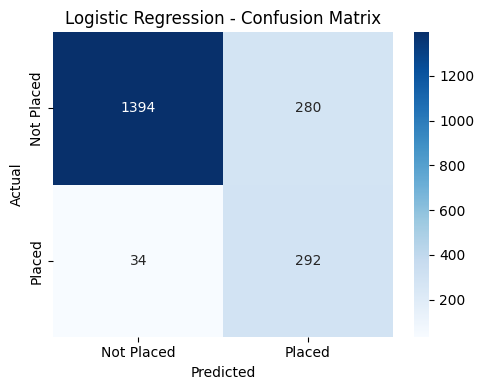


Evaluating: Random Forest
Accuracy: 0.9995

Classification Report:
              precision    recall  f1-score   support

  Not Placed       1.00      1.00      1.00      1674
      Placed       1.00      1.00      1.00       326

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



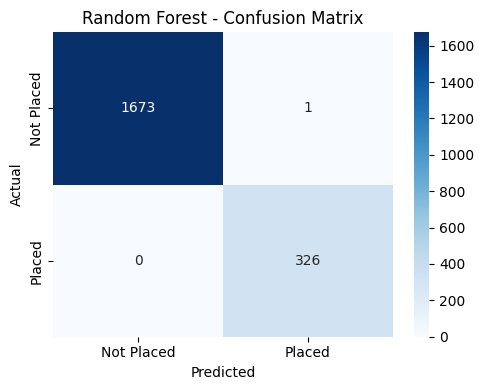


Evaluating: Decision Tree
Accuracy: 0.9995

Classification Report:
              precision    recall  f1-score   support

  Not Placed       1.00      1.00      1.00      1674
      Placed       1.00      1.00      1.00       326

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



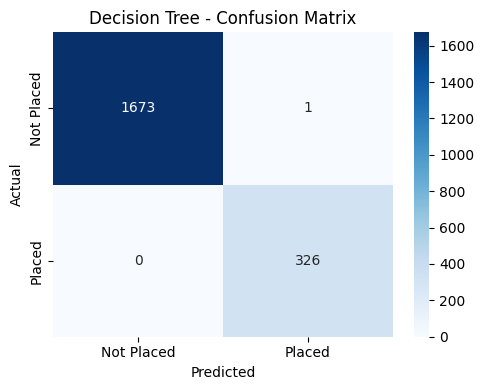


Evaluating: XGBoost
Accuracy: 0.9980

Classification Report:
              precision    recall  f1-score   support

  Not Placed       1.00      1.00      1.00      1674
      Placed       0.99      1.00      0.99       326

    accuracy                           1.00      2000
   macro avg       0.99      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



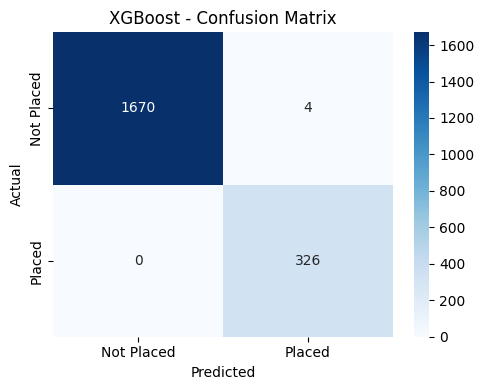

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier


#  Define models
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=500),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

#  Train and evaluate each model
for name, model in models.items():
    print(f"\nEvaluating: {name}")
    print("=" * (14 + len(name)))

    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}\n")
    
    print(f"Classification Report:")
    print(classification_report(y_test, y_pred, target_names=['Not Placed', 'Placed']))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Not Placed', 'Placed'],
                yticklabels=['Not Placed', 'Placed'])
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()


In [57]:
from sklearn.ensemble import VotingClassifier

#  Voting Classifier (Ensemble)
voting = VotingClassifier(estimators=[ 
    ('lr', models['Logistic Regression']),
    ('rf', models['Random Forest']),
    ('dt', models['Decision Tree']),
    ('xgb', models['XGBoost'])
], voting='soft')

voting.fit(x_train, y_train)
y_pred = voting.predict(x_test)

acc = accuracy_score(y_test, y_pred)
print(f"\nVoting Classifier Accuracy: {acc:.4f}")
print("Classification Report (Voting):")
print(classification_report(y_test, y_pred, target_names=['Not Placed', 'Placed']))


Voting Classifier Accuracy: 0.9990
Classification Report (Voting):
              precision    recall  f1-score   support

  Not Placed       1.00      1.00      1.00      1674
      Placed       0.99      1.00      1.00       326

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000




Random Forest - Feature Importance


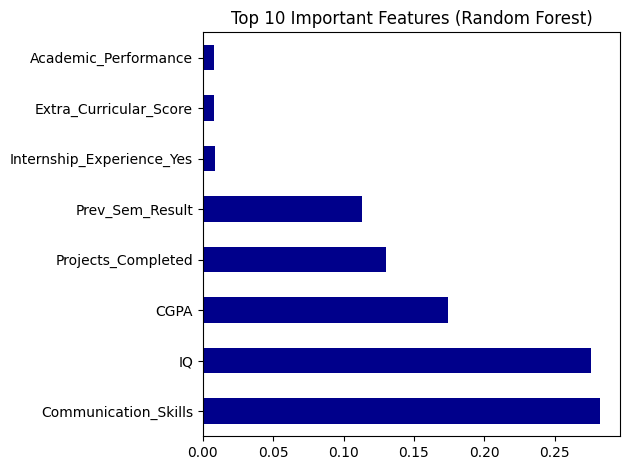

In [58]:
# Random Forest Feature Importance
print("\nRandom Forest - Feature Importance")
rf_model = models['Random Forest']
feat_importance_rf = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_importance_rf.nlargest(10).plot(kind='barh', color='darkblue')
plt.title("Top 10 Important Features (Random Forest)")
plt.tight_layout()
plt.show()


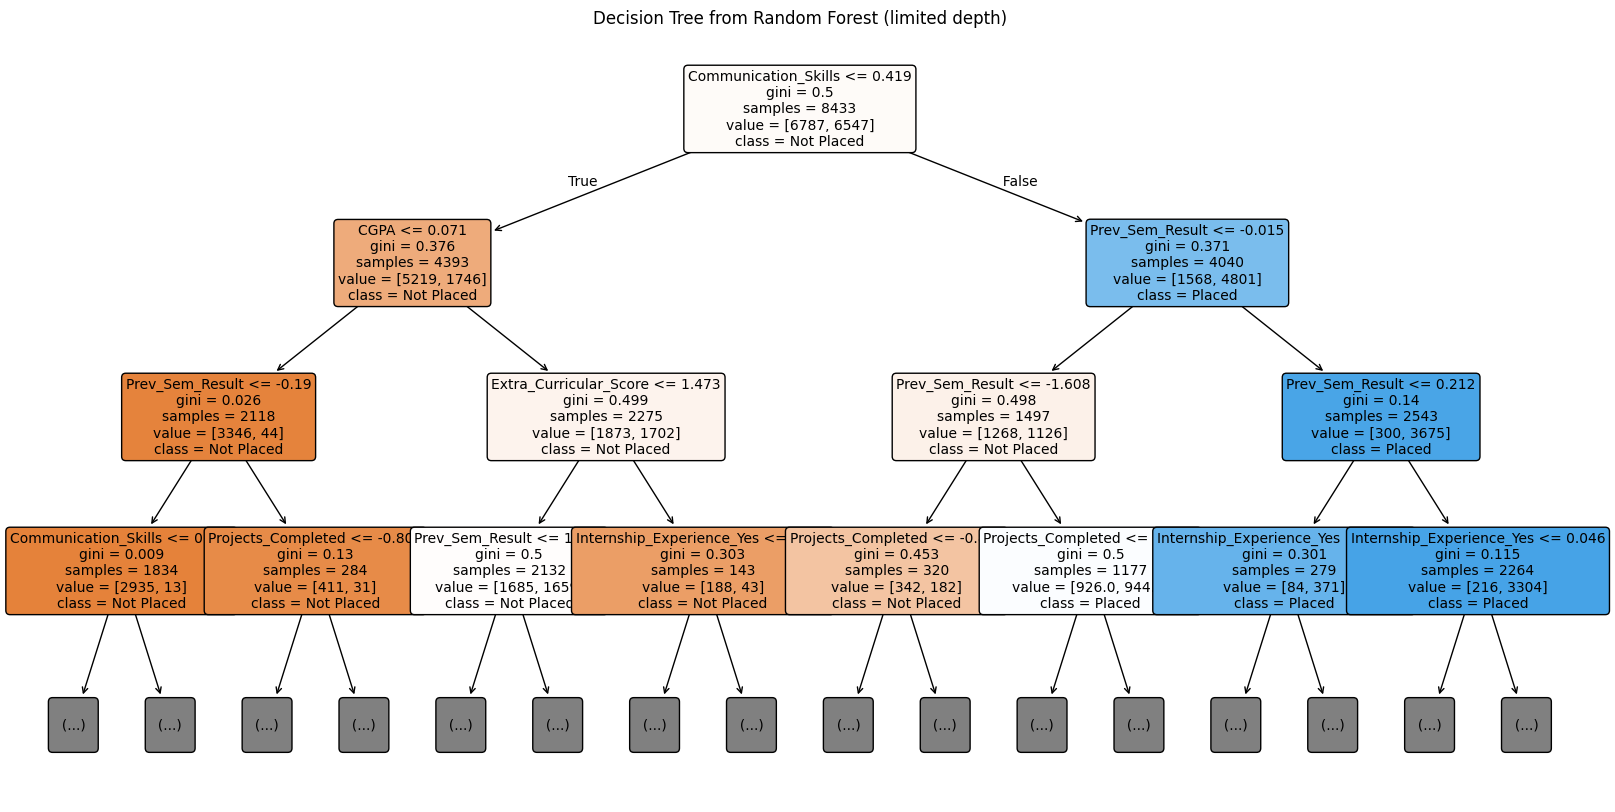

In [59]:
from sklearn.tree import plot_tree

# Extract one tree from the forest (e.g., the first one)
estimator = rf_model.estimators_[0]

# Set figure size and plot the tree
plt.figure(figsize=(20, 10))
plot_tree(estimator, 
          feature_names=X.columns, 
          class_names=['Not Placed', 'Placed'],
          filled=True, 
          rounded=True, 
          max_depth=3,   # Limit depth for clarity
          fontsize=10)
plt.title("Decision Tree from Random Forest (limited depth)")
plt.show()



Logistic Regression - Feature Importance (Coefficients)


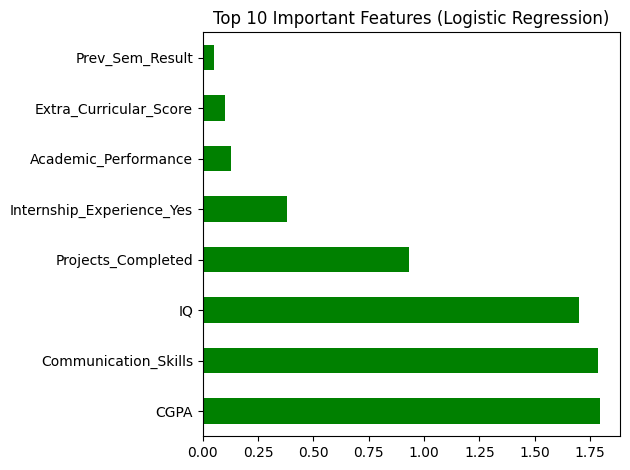

In [60]:
# Logistic Regression Feature Importance (using coefficients)
print("\nLogistic Regression - Feature Importance (Coefficients)")
logreg_model = models['Logistic Regression']
feat_importance_logreg = pd.Series(np.abs(logreg_model.coef_[0]), index=X.columns)
feat_importance_logreg.nlargest(10).plot(kind='barh', color='green')
plt.title("Top 10 Important Features (Logistic Regression)")
plt.tight_layout()
plt.show()



Decision Tree - Feature Importance


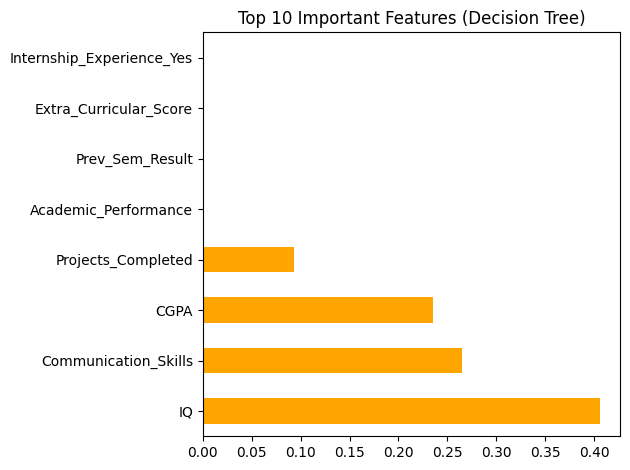

In [61]:
# Decision Tree Feature Importance
print("\nDecision Tree - Feature Importance")
dt_model = models['Decision Tree']
feat_importance_dt = pd.Series(dt_model.feature_importances_, index=X.columns)
feat_importance_dt.nlargest(10).plot(kind='barh', color='orange')
plt.title("Top 10 Important Features (Decision Tree)")
plt.tight_layout()
plt.show()


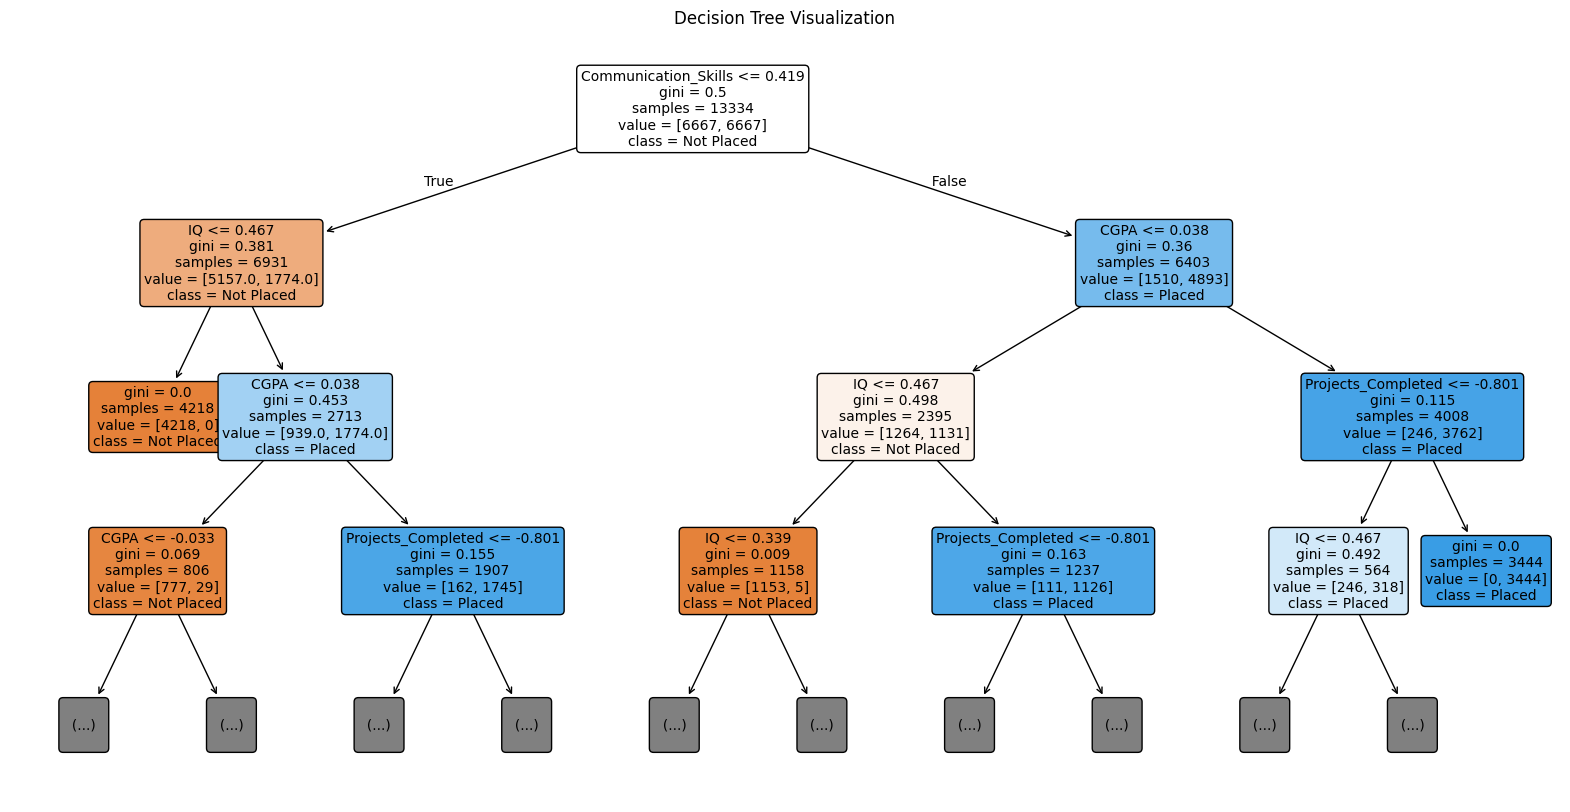

In [62]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(dt_model, 
          feature_names=X.columns, 
          class_names=['Not Placed', 'Placed'],
          filled=True, 
          rounded=True, 
          max_depth=3,  # Adjust as needed
          fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()



XGBoost - Feature Importance


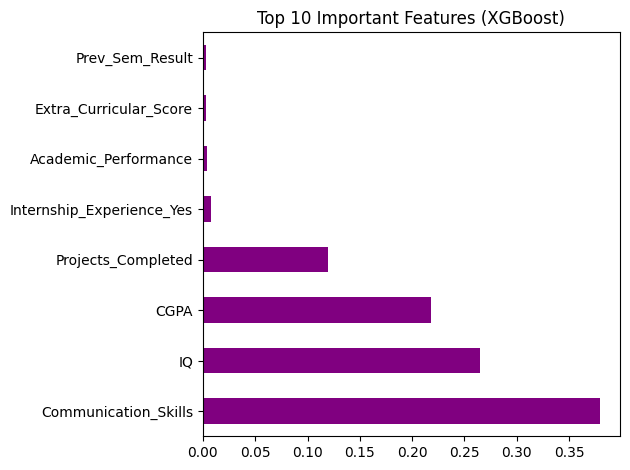

In [63]:
# XGBoost Feature Importance
print("\nXGBoost - Feature Importance")
xgb_model = models['XGBoost']
feat_importance_xgb = pd.Series(xgb_model.feature_importances_, index=X.columns)
feat_importance_xgb.nlargest(10).plot(kind='barh', color='purple')
plt.title("Top 10 Important Features (XGBoost)")
plt.tight_layout()
plt.show()